Case de detecção de anomalias:

* Fazer a importação dos arquivos fraude1.csv, fraude2.csv e fraude3.csv;
* Faça uma EDA nos dados antes da modelagem;
* Usar as técnicas de padronização dos dados antes de fitar os algoritmos de detecção de anomalias;
* Fazer a detecção de anomalias usando: IsolationForest, Local Outlier Factor;
* Fique a vontade para usar outra tecnica que conheça;





In [75]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import shap

import matplotlib.pyplot as plt
import seaborn as sns

## Importação de bases

In [2]:
fraude1 = pd.read_excel('fraude1.xlsx')
fraude1.drop(columns=['Unnamed: 0','month'], inplace=True)
fraude1 = fraude1.dropna()
fraude1.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count
0,0.9,0.166828,-1.0,88.0,50.0,0.020925,-1.331345,AA,769.0,10650.765523,...,24.0,0.0,500.0,0.0,INTERNET,3.888115,windows,0.0,1.0,0.0
1,0.9,0.296286,-1.0,144.0,50.0,0.005418,-0.816224,AB,366.0,534.047319,...,15.0,0.0,1500.0,0.0,INTERNET,31.798819,windows,0.0,1.0,0.0
2,0.9,0.044985,-1.0,132.0,40.0,3.108549,-0.755728,AC,870.0,4048.534263,...,-1.0,0.0,200.0,0.0,INTERNET,4.728705,other,0.0,1.0,0.0
3,0.9,0.159511,-1.0,22.0,50.0,0.019079,-1.205124,AB,810.0,3457.064063,...,31.0,1.0,200.0,0.0,INTERNET,2.047904,linux,0.0,1.0,0.0
4,0.9,0.596414,-1.0,218.0,50.0,0.004441,-0.773276,AB,890.0,5020.341679,...,31.0,0.0,1500.0,0.0,INTERNET,3.775225,macintosh,1.0,1.0,0.0


In [3]:
fraude1.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count
count,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,...,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.0
mean,0.636339,0.470165,20.212891,74.212478,33.871501,7.992599e-01,5.302758,998.944944,3581.764116,3268.831857,...,0.450780,0.901766,10.009503,0.178287,514.763971,0.023138,6.822495,0.616569,1.010123,0.0
std,0.276238,0.279009,46.935682,78.657477,11.598911,5.001140e+00,16.926345,668.837473,1980.953205,1166.703345,...,0.497597,0.297646,12.121736,0.382774,489.573529,0.150350,8.095526,0.486247,0.134459,0.0
min,0.100000,0.000412,-1.000000,-1.000000,10.000000,8.072689e-07,-9.353172,13.000000,1.291427,1396.388897,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,0.000000,0.0
25%,0.400000,0.218591,-1.000000,12.000000,30.000000,6.574096e-03,-1.199935,571.000000,2196.017230,2543.399330,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,2.297863,0.000000,1.000000,0.0
50%,0.700000,0.473714,-1.000000,44.000000,30.000000,1.415410e-02,-0.894007,849.000000,3449.525962,3014.626115,...,0.000000,1.000000,2.000000,0.000000,200.000000,0.000000,4.332842,1.000000,1.000000,0.0
75%,0.900000,0.699759,27.000000,116.000000,40.000000,2.396344e-02,-0.488127,1219.000000,4557.491453,3592.688587,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.041998,1.000000,1.000000,0.0
max,0.900000,0.999983,355.000000,387.000000,90.000000,7.462660e+01,111.528620,6126.000000,16356.364000,8965.226197,...,1.000000,1.000000,32.000000,1.000000,2000.000000,1.000000,83.376775,1.000000,2.000000,0.0


In [5]:
fraude1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9680
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            9681 non-null   float64
 1   name_email_similarity             9681 non-null   float64
 2   prev_address_months_count         9681 non-null   float64
 3   current_address_months_count      9681 non-null   float64
 4   customer_age                      9681 non-null   float64
 5   days_since_request                9681 non-null   float64
 6   intended_balcon_amount            9681 non-null   float64
 7   payment_type                      9681 non-null   object 
 8   zip_count_4w                      9681 non-null   float64
 9   velocity_6h                       9681 non-null   float64
 10  velocity_24h                      9681 non-null   float64
 11  velocity_4w                       9681 non-null   float64
 12  bank_b

In [6]:
for i in list(fraude1.select_dtypes(include=['object']).columns):
    print(i, fraude1[i].unique())

payment_type ['AA' 'AB' 'AC' 'AD' 'AE']
employment_status ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status ['BA' 'BB' 'BC' 'BD' 'BE' 'BF']
source ['INTERNET' 'TELEAPP']
device_os ['windows' 'other' 'linux' 'macintosh' 'x11']


In [7]:
fraude2 = pd.read_excel('fraude2.xlsx')
fraude2.drop(columns=['Unnamed: 0','month'], inplace=True)
fraude2 = fraude2.dropna()
fraude2.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count
0,0.6,0.252681,-1.0,188.0,20.0,0.021614,-0.266603,AC,2596.0,11237.202503,...,15.0,0.0,1000.0,1.0,INTERNET,7.634858,linux,0.0,1.0,0.0
1,0.9,0.185206,-1.0,51.0,30.0,0.001696,-1.191015,AD,898.0,6811.421858,...,10.0,0.0,1500.0,0.0,INTERNET,5.408299,other,0.0,1.0,0.0
2,0.1,0.505509,-1.0,187.0,20.0,0.011880,-1.252679,AB,2851.0,8425.498770,...,1.0,0.0,500.0,0.0,INTERNET,9.401087,linux,1.0,1.0,0.0
3,0.2,0.612030,-1.0,55.0,20.0,0.001582,-3.001035,AA,4035.0,8513.696191,...,1.0,0.0,200.0,0.0,INTERNET,4.165579,linux,0.0,1.0,0.0
4,0.4,0.592596,319.0,68.0,30.0,0.011189,-0.729188,AB,1611.0,4226.142238,...,28.0,0.0,200.0,1.0,INTERNET,8.971943,linux,0.0,1.0,0.0


In [8]:
fraude2.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count
count,19355.000000,19355.000000,19355.000000,19355.00000,19355.00000,19355.000000,19355.000000,19355.000000,19355.000000,19355.000000,...,19355.000000,19355.000000,19355.000000,19355.000000,19355.000000,19355.00000,19355.000000,19355.000000,19355.000000,19355.0
mean,0.563095,0.492040,16.938156,83.61395,31.99380,1.006233,8.656117,1573.890674,5635.693894,4743.872776,...,0.400775,0.899509,10.829346,0.215397,507.938001,0.02325,7.483567,0.578714,1.017102,0.0
std,0.288700,0.288494,43.705355,86.55274,10.94284,5.257386,20.108803,998.076367,2996.382547,1470.778164,...,0.490068,0.300661,12.133339,0.411108,483.155629,0.15070,8.065928,0.493778,0.177146,0.0
min,0.100000,0.000094,-1.000000,-1.00000,10.00000,0.000004,-12.412801,10.000000,113.403684,1426.866317,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.00000,-1.000000,0.000000,-1.000000,0.0
25%,0.300000,0.224462,-1.000000,18.00000,20.00000,0.007144,-1.169865,892.000000,3422.167229,3572.474158,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.00000,3.061970,0.000000,1.000000,0.0
50%,0.600000,0.491695,-1.000000,50.00000,30.00000,0.015041,-0.825881,1275.000000,5285.745496,4721.762835,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.00000,5.064111,1.000000,1.000000,0.0
75%,0.800000,0.750912,19.000000,124.00000,40.00000,0.026360,6.257671,1954.000000,7631.943217,5710.221941,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.00000,8.676373,1.000000,1.000000,0.0
max,0.900000,0.999982,367.000000,407.00000,80.00000,74.136234,112.613538,6246.000000,16472.270839,9389.708381,...,1.000000,1.000000,31.000000,1.000000,2000.000000,1.00000,84.987829,1.000000,2.000000,0.0


In [9]:
fraude2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19355 entries, 0 to 19354
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            19355 non-null  float64
 1   name_email_similarity             19355 non-null  float64
 2   prev_address_months_count         19355 non-null  float64
 3   current_address_months_count      19355 non-null  float64
 4   customer_age                      19355 non-null  float64
 5   days_since_request                19355 non-null  float64
 6   intended_balcon_amount            19355 non-null  float64
 7   payment_type                      19355 non-null  object 
 8   zip_count_4w                      19355 non-null  float64
 9   velocity_6h                       19355 non-null  float64
 10  velocity_24h                      19355 non-null  float64
 11  velocity_4w                       19355 non-null  float64
 12  bank

In [10]:
for i in list(fraude2.select_dtypes(include=['object']).columns):
    print(i, fraude2[i].unique())

payment_type ['AC' 'AD' 'AB' 'AA' 'AE']
employment_status ['CB' 'CA' 'CE' 'CC' 'CD' 'CF' 'CG']
housing_status ['BB' 'BC' 'BE' 'BA' 'BD' 'BF' 'BG']
source ['INTERNET' 'TELEAPP']
device_os ['linux' 'other' 'windows' 'macintosh' 'x11']


In [11]:
fraude3 = pd.read_excel('fraude3.xlsx')
# Variável month removida por indicar aspecto temporal
fraude3.drop(columns=['Unnamed: 0','month'], inplace=True)
fraude3 = fraude3.dropna()
fraude3.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,x1,x2
0,0.1,0.054656,-1,55,50,0.029642,-0.779957,AB,1735,13175.837145,...,200,0,INTERNET,5.063178,linux,0,1,0,-0.833286,-0.239018
1,0.2,0.516874,-1,178,50,0.036917,-0.471011,AB,910,7956.210922,...,200,0,INTERNET,5.403648,linux,0,1,0,-0.044042,1.174898
2,0.1,0.870572,-1,26,30,11.838249,51.068616,AA,1730,7955.039183,...,200,0,INTERNET,6.701977,linux,1,1,0,2.094070,0.643121
3,0.1,0.234248,29,9,20,0.030793,16.341333,AA,533,3815.606033,...,200,0,INTERNET,12.787474,linux,1,1,0,-1.060523,0.285319
4,0.2,0.909504,11,5,30,0.036117,-1.151589,AB,2935,9462.987447,...,200,0,INTERNET,4.670977,linux,0,1,0,1.989430,-0.803668


In [12]:
fraude3.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,x1,x2
count,16394.000000,16394.000000,16394.000000,16394.000000,16394.000000,1.639400e+04,16394.000000,16394.000000,16394.000000,16394.000000,...,16394.000000,16394.000000,16394.000000,16394.000000,16394.000000,16394.000000,16394.000000,16394.0,16394.000000,16394.000000
mean,0.576662,0.487694,14.563743,99.757228,41.621935,9.454936e-01,8.571046,1528.714347,5481.800113,4657.746149,...,11.194156,0.247164,552.034891,0.022874,7.761136,0.560266,1.019946,0.0,0.016958,0.009339
std,0.288712,0.293081,42.791420,93.824729,13.732845,5.338450e+00,20.614556,975.143359,2909.689508,1454.292599,...,12.178688,0.431376,509.165773,0.149507,8.253010,0.496370,0.181240,0.0,1.021140,1.014486
min,0.100000,0.000153,-1.000000,-1.000000,10.000000,8.512350e-07,-12.209195,3.000000,-10.548160,1461.838992,...,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,-3.630781,-3.807119
25%,0.300000,0.211995,-1.000000,28.000000,30.000000,7.764127e-03,-1.175096,890.000000,3348.235387,3505.946923,...,1.000000,0.000000,200.000000,0.000000,3.096152,0.000000,1.000000,0.0,-0.656948,-0.675141
50%,0.600000,0.484875,-1.000000,66.000000,50.000000,1.594863e-02,-0.832934,1217.000000,5176.078154,4639.774892,...,6.000000,0.000000,200.000000,0.000000,5.217770,1.000000,1.000000,0.0,0.010624,0.006952
75%,0.800000,0.758587,-1.000000,153.750000,50.000000,2.729688e-02,-0.039583,1859.000000,7342.680148,5585.215846,...,25.000000,0.000000,1000.000000,0.000000,9.366245,1.000000,1.000000,0.0,0.694936,0.690551
max,0.900000,0.999997,354.000000,392.000000,90.000000,7.433285e+01,111.137887,6470.000000,16411.757721,9505.599398,...,31.000000,1.000000,2100.000000,1.000000,81.198976,1.000000,2.000000,0.0,5.002287,4.725253


In [13]:
fraude3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16394 entries, 0 to 16393
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            16394 non-null  float64
 1   name_email_similarity             16394 non-null  float64
 2   prev_address_months_count         16394 non-null  int64  
 3   current_address_months_count      16394 non-null  int64  
 4   customer_age                      16394 non-null  int64  
 5   days_since_request                16394 non-null  float64
 6   intended_balcon_amount            16394 non-null  float64
 7   payment_type                      16394 non-null  object 
 8   zip_count_4w                      16394 non-null  int64  
 9   velocity_6h                       16394 non-null  float64
 10  velocity_24h                      16394 non-null  float64
 11  velocity_4w                       16394 non-null  float64
 12  bank

In [14]:
for i in list(fraude3.select_dtypes(include=['object']).columns):
    print(i, fraude3[i].unique())

payment_type ['AB' 'AA' 'AC' 'AD' 'AE']
employment_status ['CC' 'CA' 'CB' 'CE' 'CF' 'CD' 'CG']
housing_status ['BB' 'BC' 'BA' 'BE' 'BD' 'BF' 'BG']
source ['INTERNET' 'TELEAPP']
device_os ['linux' 'windows' 'other' 'macintosh' 'x11']


In [15]:
def histogram(col,df):
    df[col].hist(bins=50)
    plt.show()

income


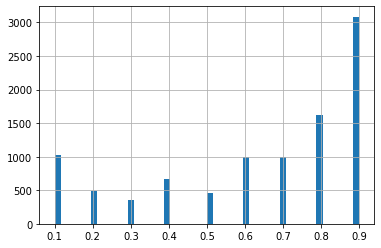

name_email_similarity


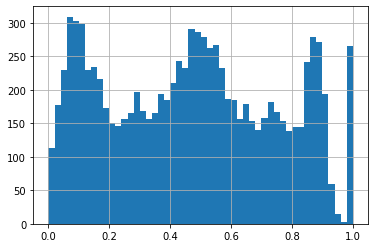

prev_address_months_count


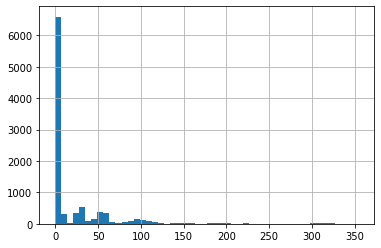

current_address_months_count


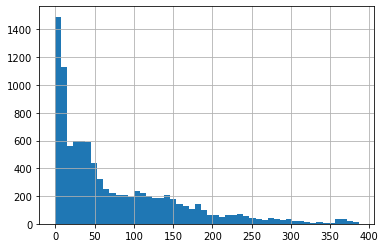

customer_age


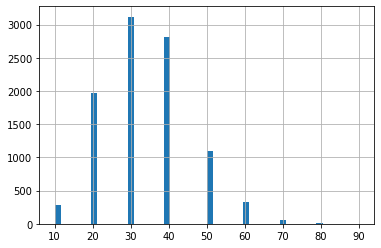

days_since_request


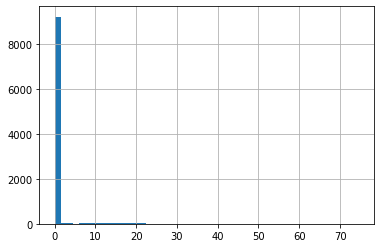

intended_balcon_amount


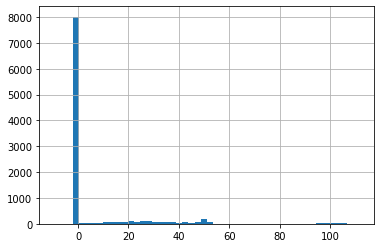

zip_count_4w


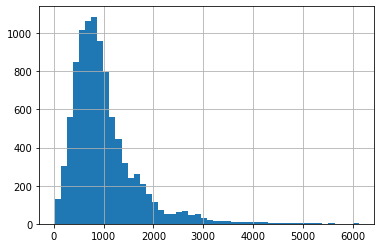

velocity_6h


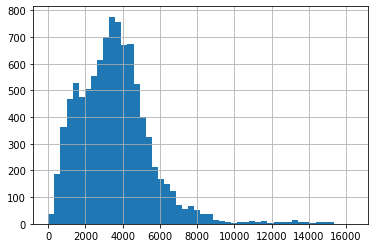

velocity_24h


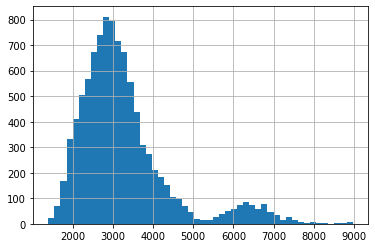

velocity_4w


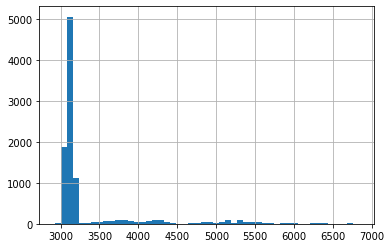

bank_branch_count_8w


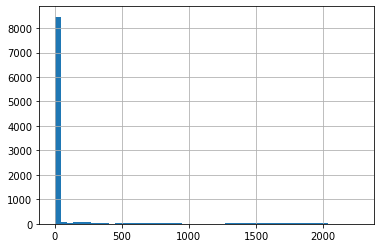

date_of_birth_distinct_emails_4w


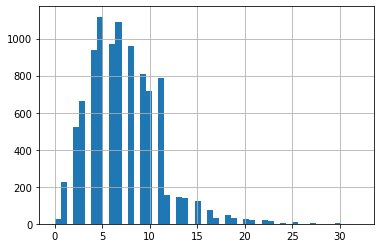

credit_risk_score


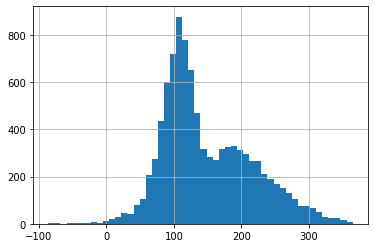

email_is_free


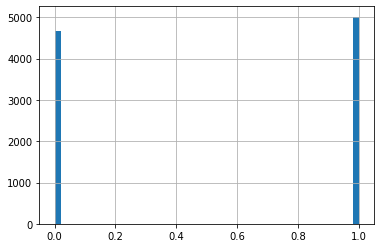

phone_home_valid


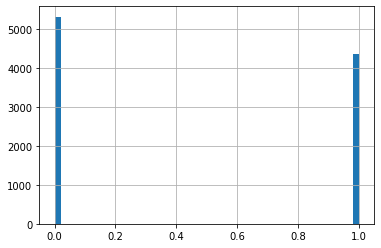

phone_mobile_valid


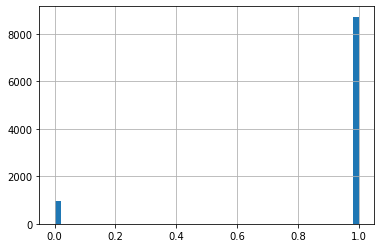

bank_months_count


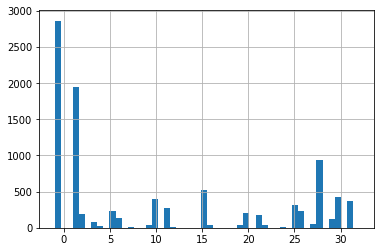

has_other_cards


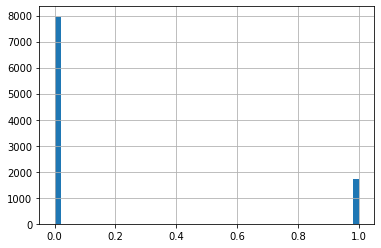

proposed_credit_limit


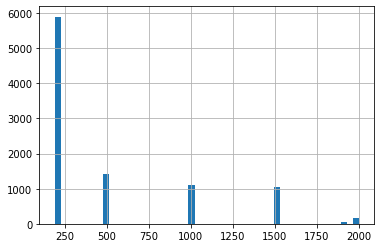

foreign_request


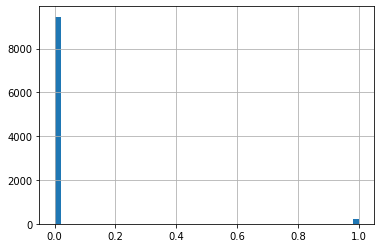

session_length_in_minutes


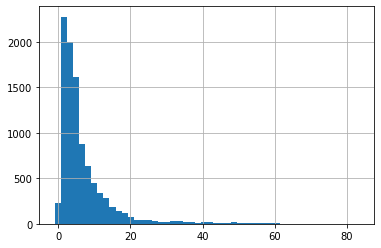

keep_alive_session


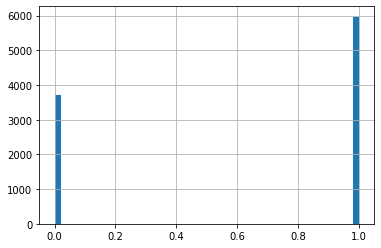

device_distinct_emails_8w


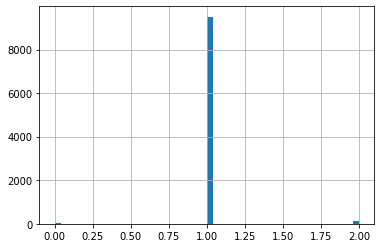

device_fraud_count


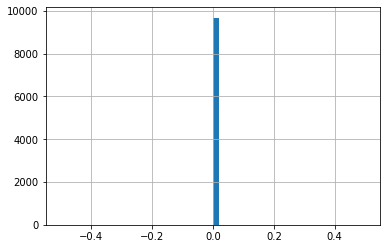

income


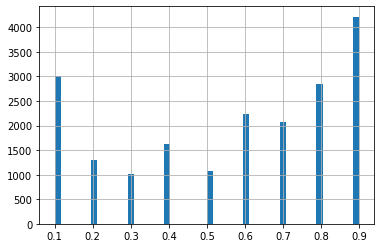

name_email_similarity


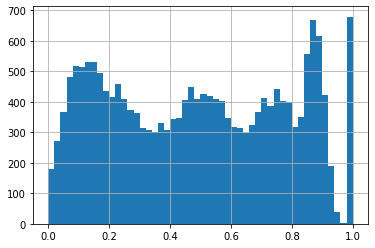

prev_address_months_count


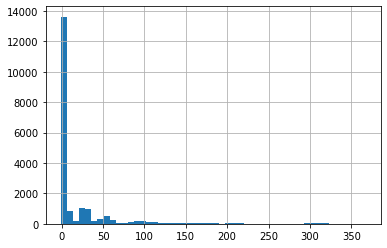

current_address_months_count


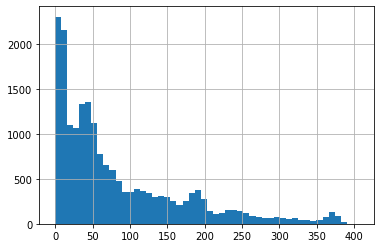

customer_age


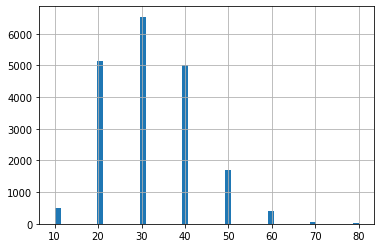

days_since_request


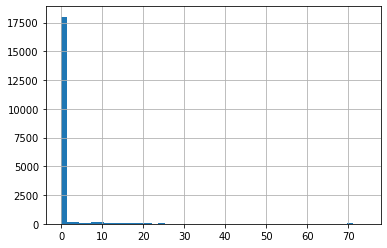

intended_balcon_amount


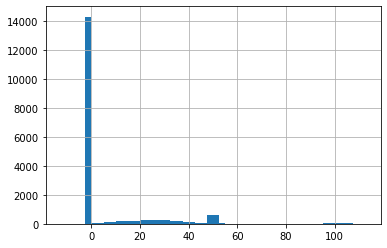

zip_count_4w


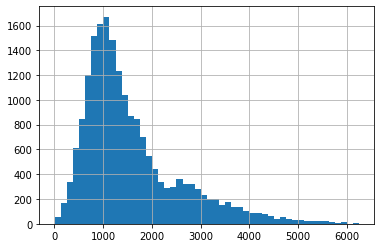

velocity_6h


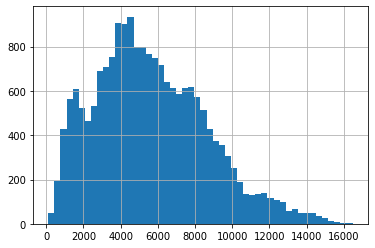

velocity_24h


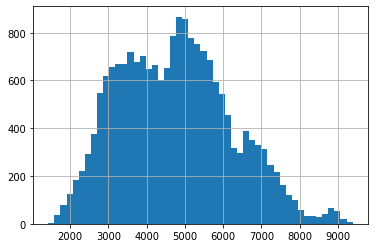

velocity_4w


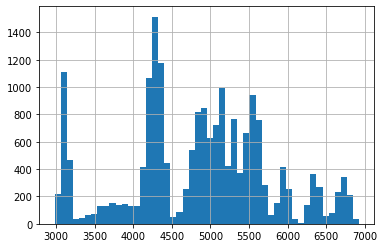

bank_branch_count_8w


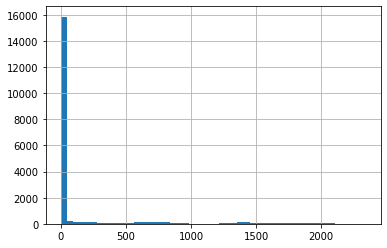

date_of_birth_distinct_emails_4w


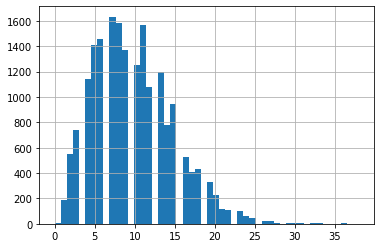

credit_risk_score


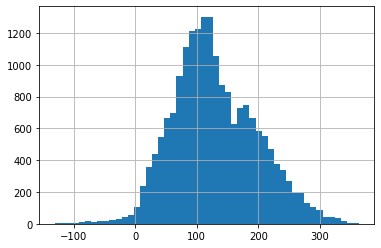

email_is_free


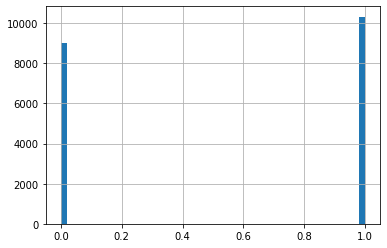

phone_home_valid


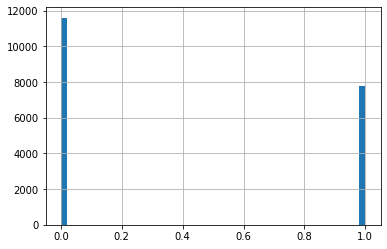

phone_mobile_valid


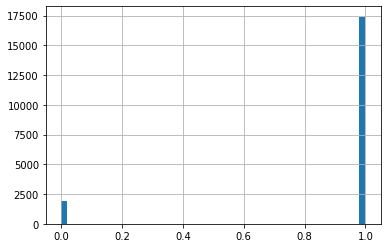

bank_months_count


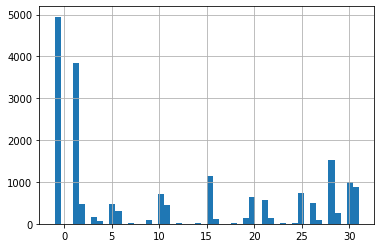

has_other_cards


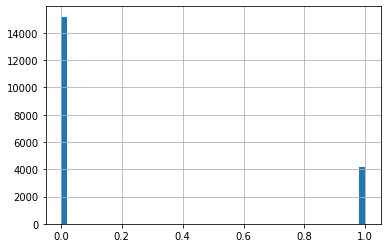

proposed_credit_limit


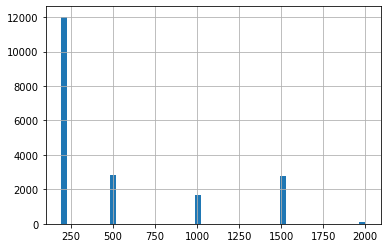

foreign_request


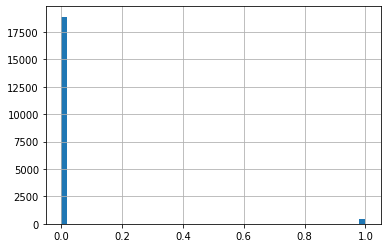

session_length_in_minutes


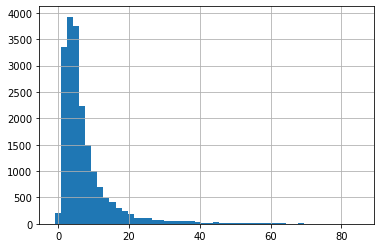

keep_alive_session


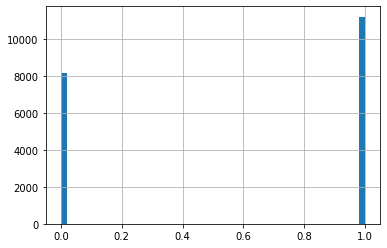

device_distinct_emails_8w


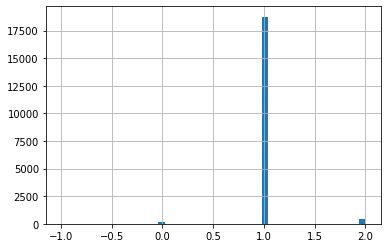

device_fraud_count


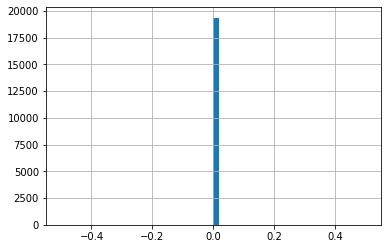

income


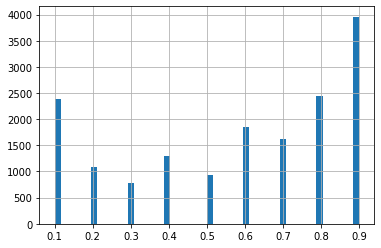

name_email_similarity


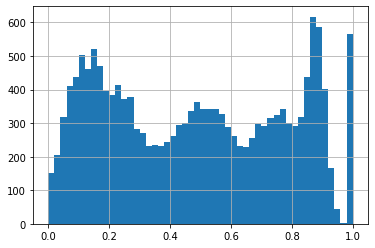

prev_address_months_count


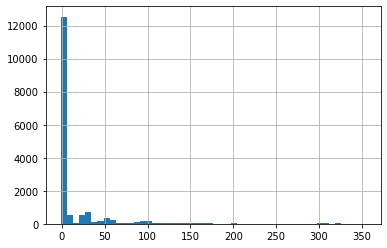

current_address_months_count


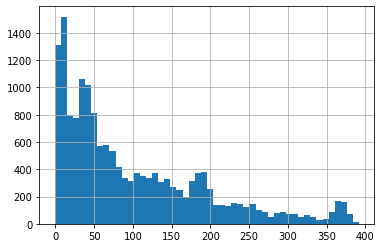

customer_age


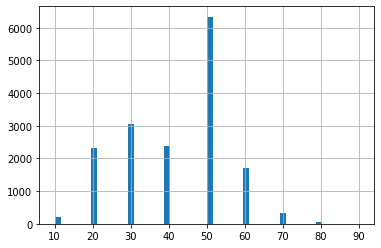

days_since_request


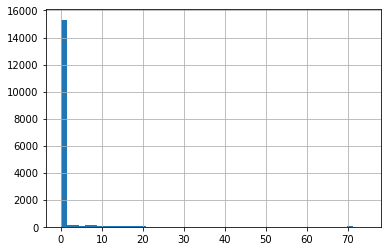

intended_balcon_amount


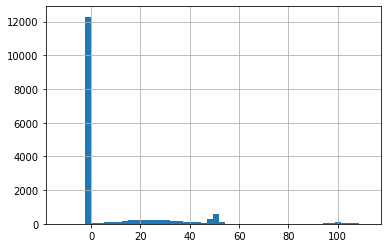

zip_count_4w


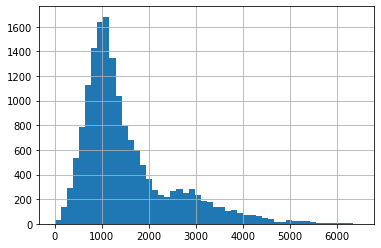

velocity_6h


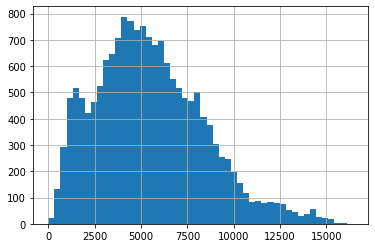

velocity_24h


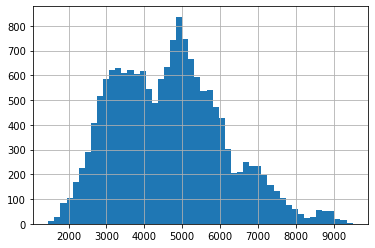

velocity_4w


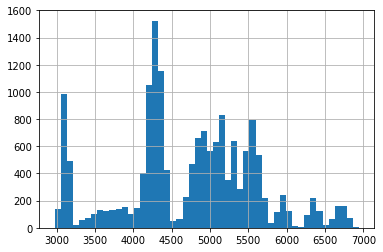

bank_branch_count_8w


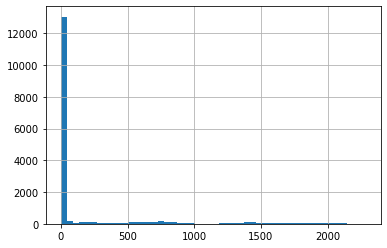

date_of_birth_distinct_emails_4w


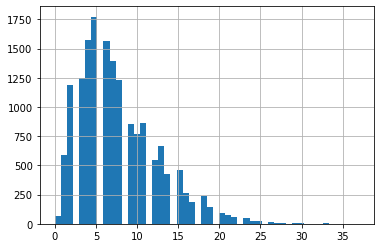

credit_risk_score


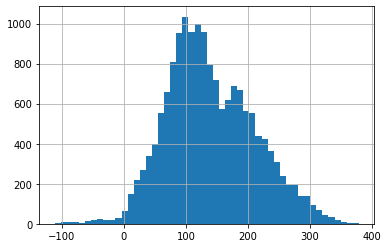

email_is_free


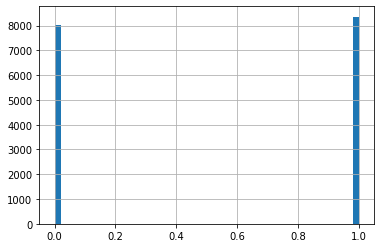

phone_home_valid


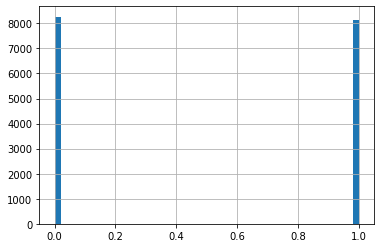

phone_mobile_valid


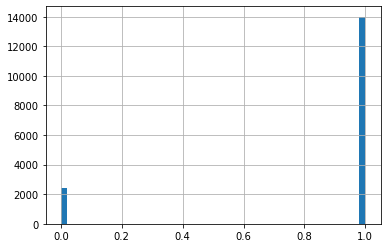

bank_months_count


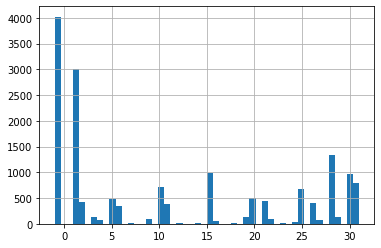

has_other_cards


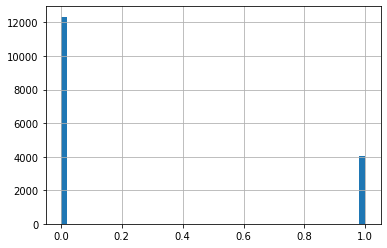

proposed_credit_limit


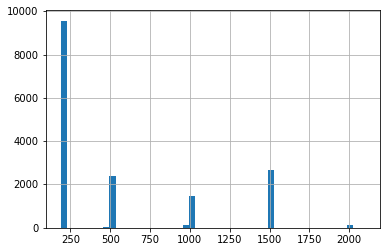

foreign_request


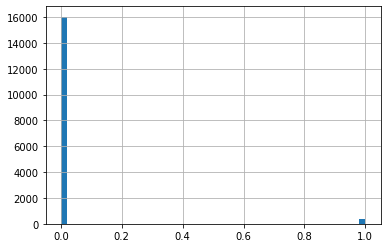

session_length_in_minutes


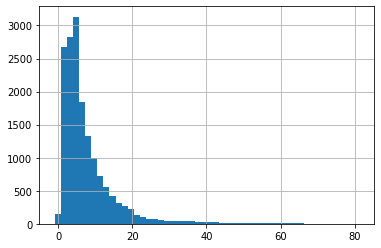

keep_alive_session


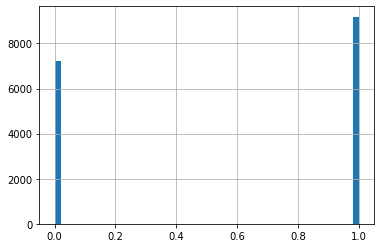

device_distinct_emails_8w


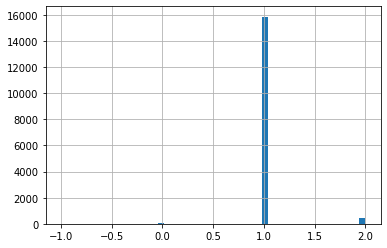

device_fraud_count


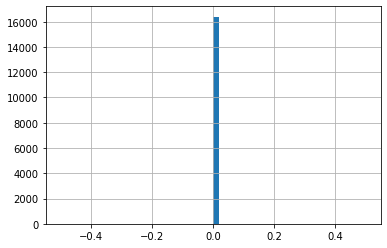

x1


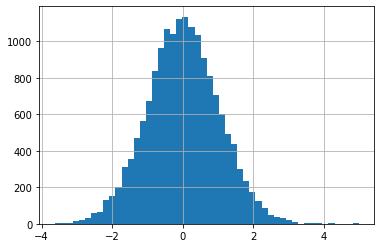

x2


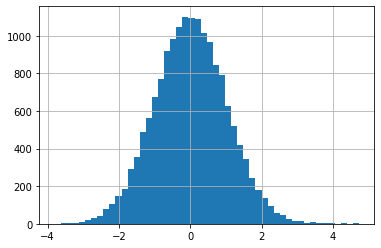

In [16]:
for fraude in [fraude1,fraude2,fraude3]:
    for col in fraude.columns:
        if is_numeric_dtype(fraude[col]):
            print(col)
            histogram(col,fraude)

In [17]:
def analise_multivariada(col1,col2):
    sns.scatterplot(fraude1, x=col1, y=col2)
    plt.show()
    sns.scatterplot(fraude2, x=col1, y=col2)
    plt.show()
    sns.scatterplot(fraude3, x=col1, y=col2)
    plt.show()

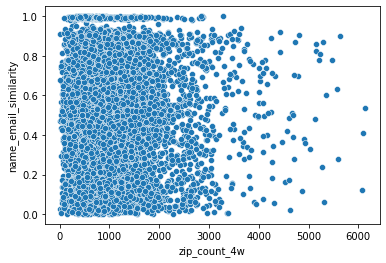

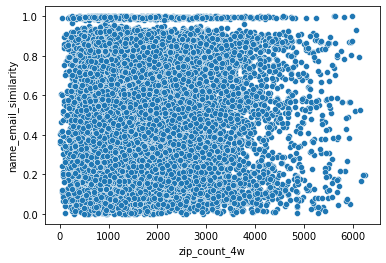

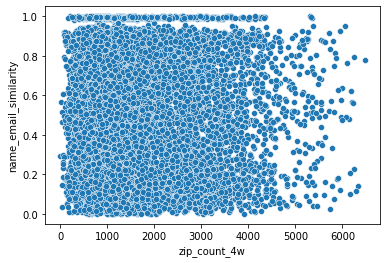

In [18]:
analise_multivariada('zip_count_4w','name_email_similarity')

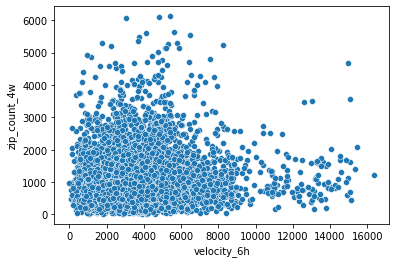

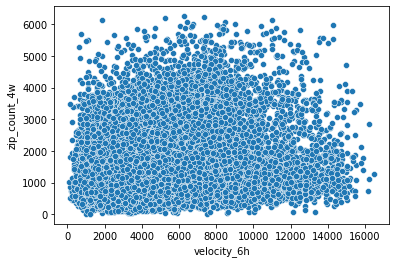

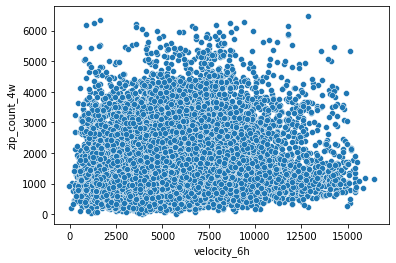

In [19]:
analise_multivariada('velocity_6h','zip_count_4w')

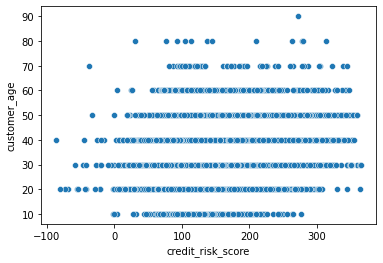

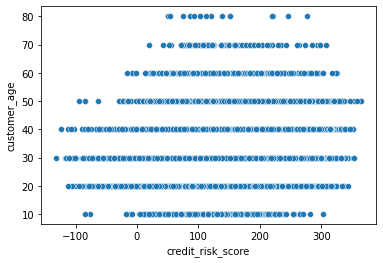

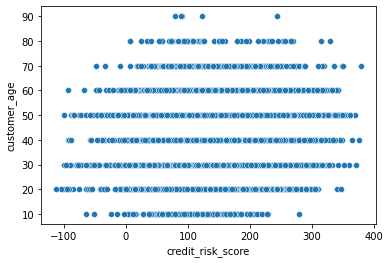

In [20]:
analise_multivariada('credit_risk_score','customer_age')

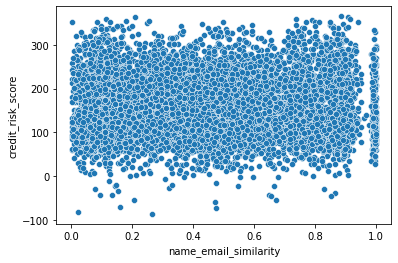

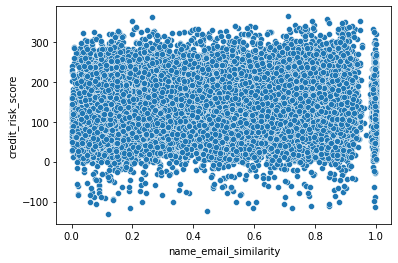

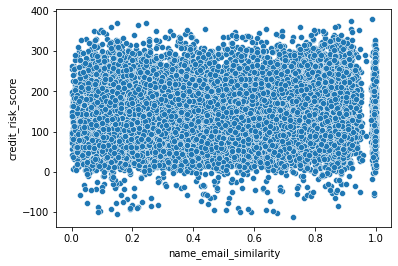

In [21]:
analise_multivariada('name_email_similarity','credit_risk_score')

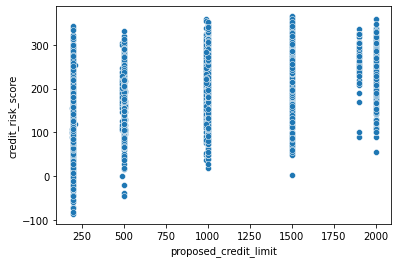

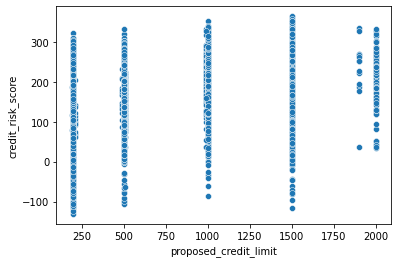

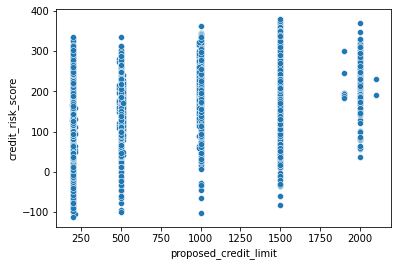

In [22]:
analise_multivariada('proposed_credit_limit','credit_risk_score')

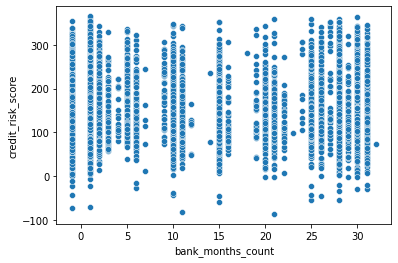

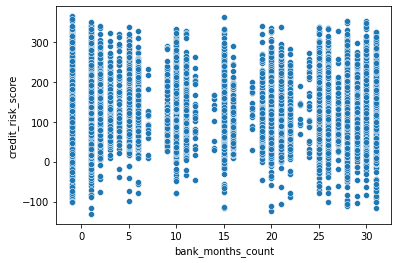

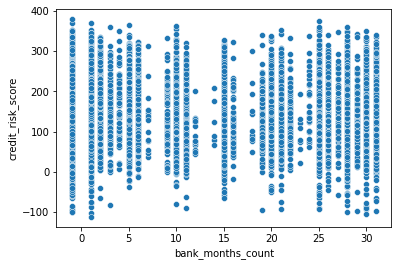

In [23]:
analise_multivariada('bank_months_count','credit_risk_score')

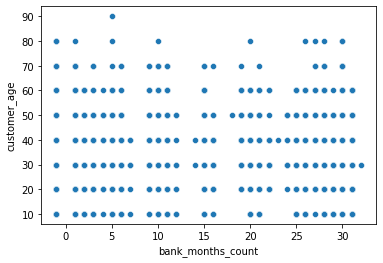

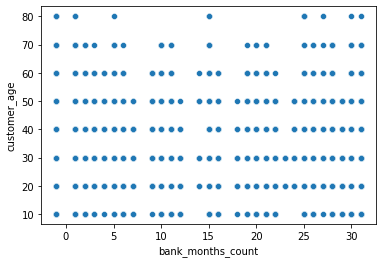

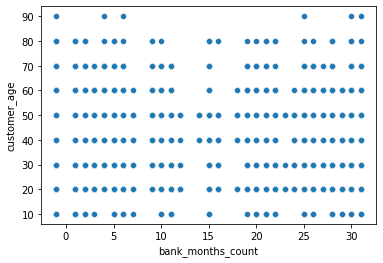

In [24]:
analise_multivariada('bank_months_count','customer_age')

In [25]:
def aed_multiple_features(col1, col2, df):
    
    fraude = df.copy()
    fraude['index'] = fraude.index
    df_total = fraude.groupby([col1], as_index=False)[col2].count()
    df_total.rename(columns={col2: 'total'}, inplace=True)
    
    df_aux = fraude.groupby([col1, col2], as_index=False)['index'].count()
    
    df_total = df_aux.merge(df_total, on=col1, how='left')
    df_total['percentual'] = df_total['index']/df_total['total']
    color = ['red','blue','green']
    fg = sns.histplot(df_total, x=col1, hue=col2, weights='percentual',
             multiple='stack', shrink=0.8)
    plt.xticks(rotation=90)

    plt.show()

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


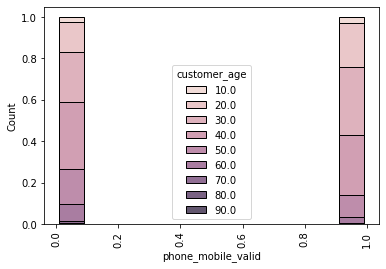

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


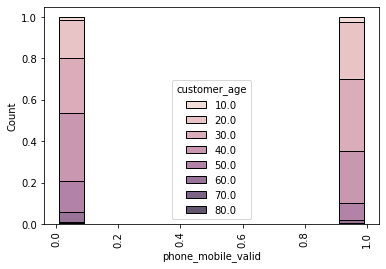

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


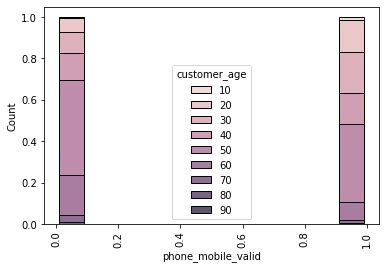

In [26]:
aed_multiple_features('phone_mobile_valid', 'customer_age',fraude1)
aed_multiple_features('phone_mobile_valid', 'customer_age',fraude2)
aed_multiple_features('phone_mobile_valid', 'customer_age',fraude3)

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


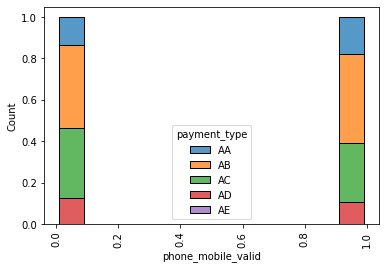

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


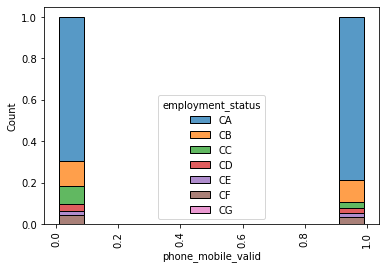

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


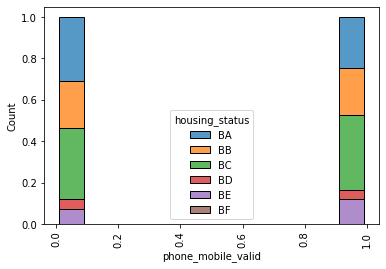

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


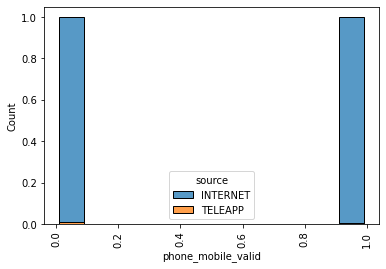

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


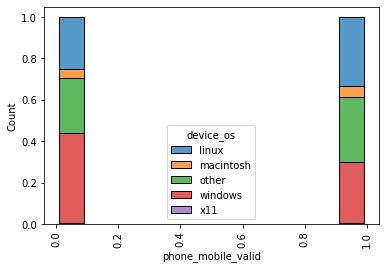

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


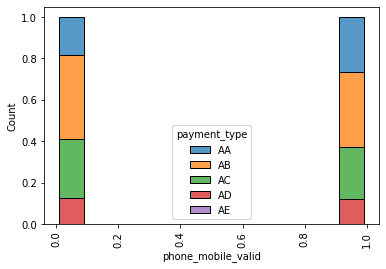

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


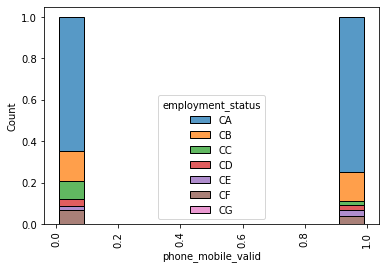

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


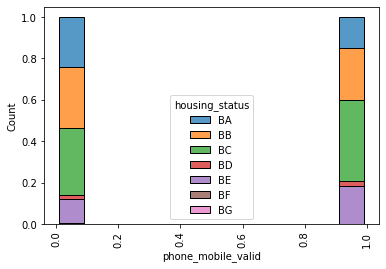

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


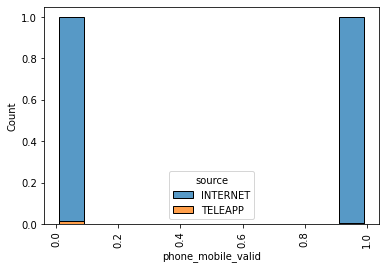

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


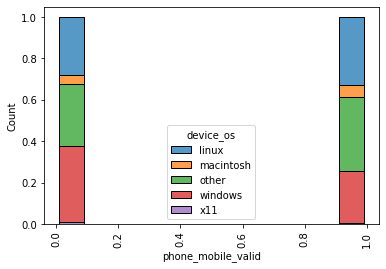

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


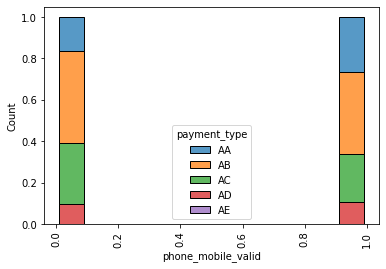

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


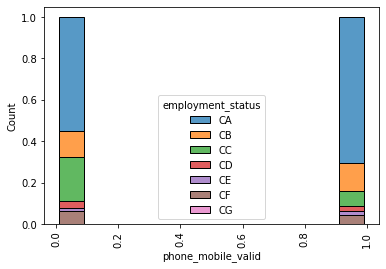

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


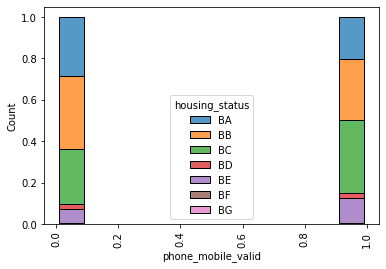

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


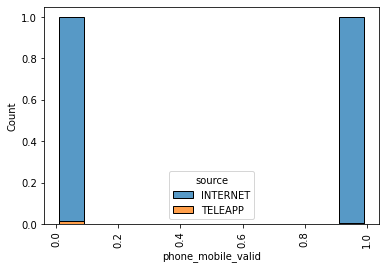

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


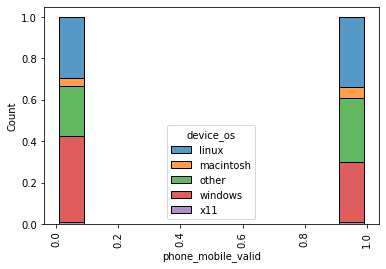

In [27]:
for fraude in [fraude1,fraude2,fraude3]:
    for col in fraude.columns:
        if (is_string_dtype(fraude[col])):
            aed_multiple_features('phone_mobile_valid', col,fraude)

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


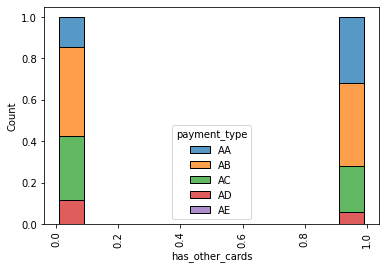

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


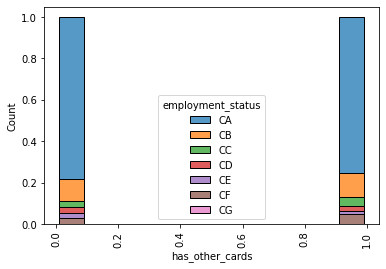

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


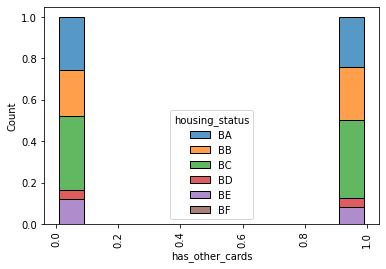

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


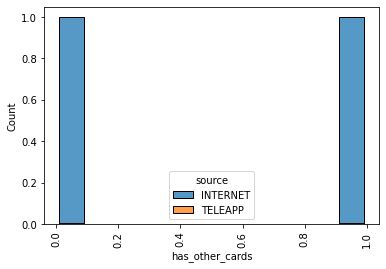

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


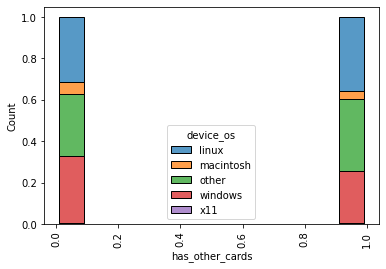

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


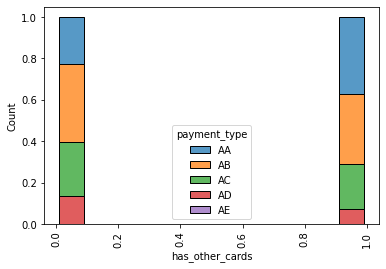

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


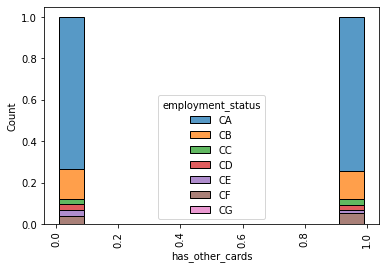

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


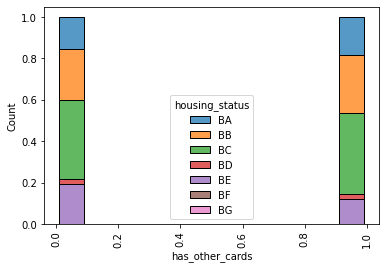

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


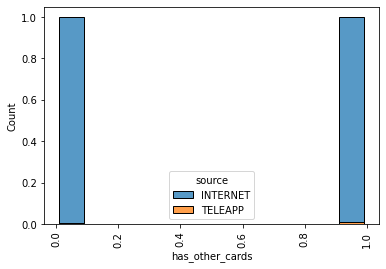

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


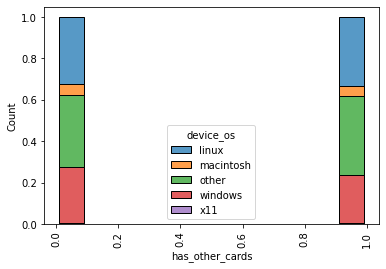

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


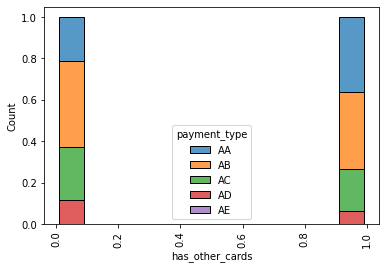

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


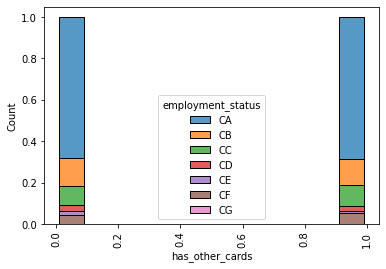

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


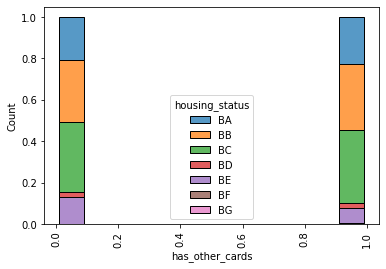

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


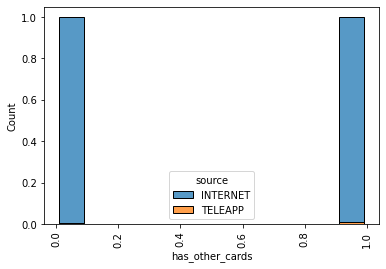

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.


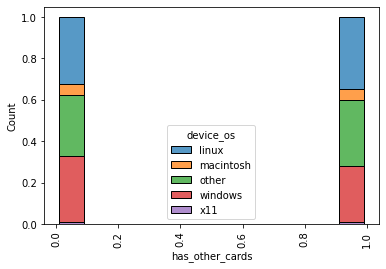

In [28]:
for fraude in [fraude1,fraude2,fraude3]:
    for col in fraude.columns:
        if (is_string_dtype(fraude[col])):
            aed_multiple_features('has_other_cards', col, fraude)

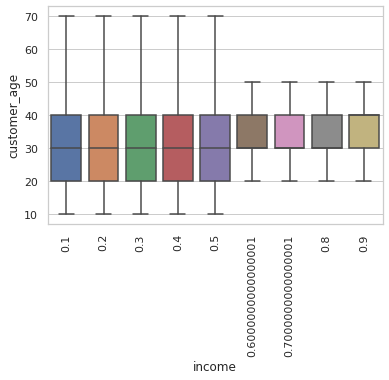

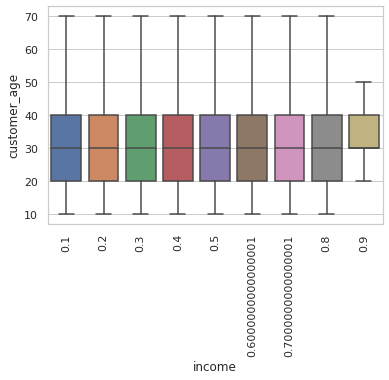

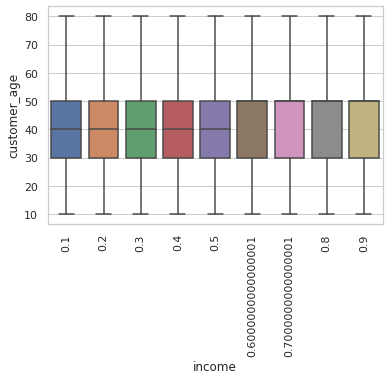

In [29]:
for fraude in [fraude1,fraude2,fraude3]:
    sns.set(style="whitegrid")
    sns.boxplot(x="income",y="customer_age", data=fraude, showfliers=False)
    plt.xticks(rotation=90)
    plt.show()

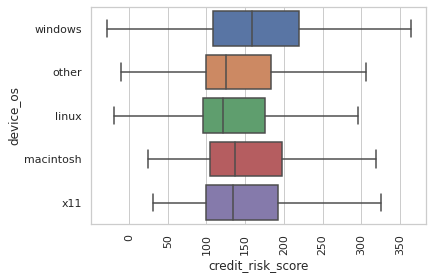

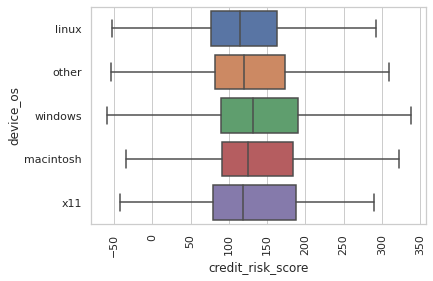

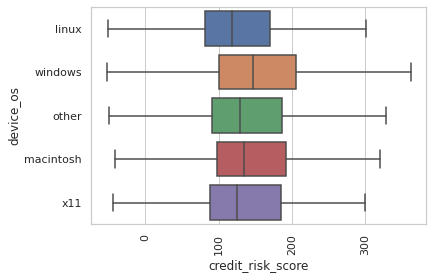

In [30]:
for fraude in [fraude1,fraude2,fraude3]:
    sns.set(style="whitegrid")
    sns.boxplot(x="credit_risk_score",y="device_os", data=fraude, showfliers=False)
    plt.xticks(rotation=90)
    plt.show()

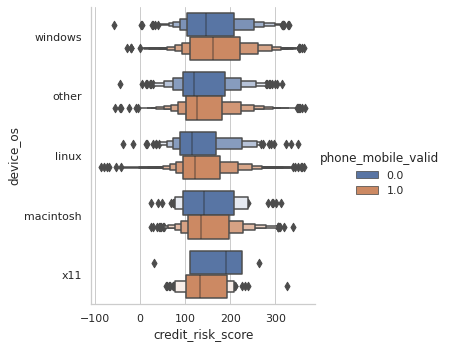

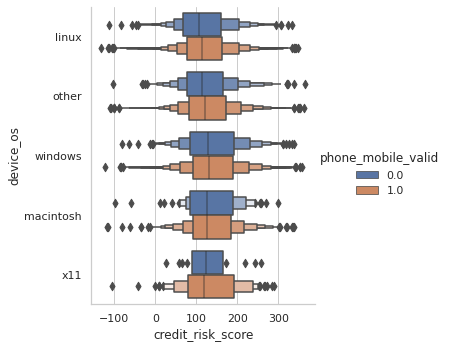

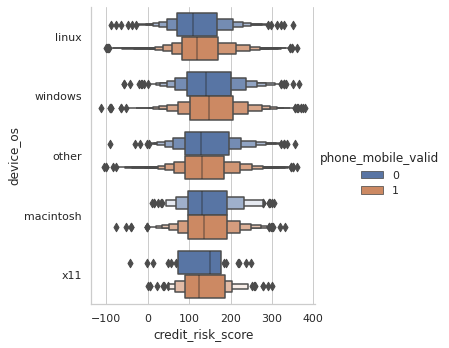

In [31]:
for fraude in [fraude1,fraude2,fraude3]:
    fg = sns.catplot(fraude, x='credit_risk_score', y='device_os', hue='phone_mobile_valid', kind='boxen')
    plt.show()

<AxesSubplot:xlabel='credit_risk_score', ylabel='device_os'>

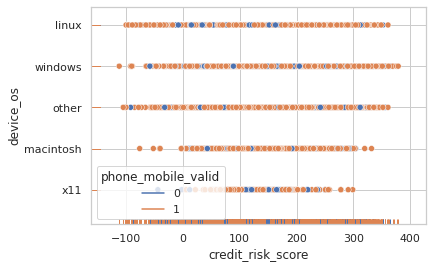

In [32]:
sns.scatterplot(fraude, x='credit_risk_score', y='device_os', hue='phone_mobile_valid')
sns.rugplot(fraude, x='credit_risk_score', y='device_os', hue='phone_mobile_valid')

Transformando categóricas e binárias em indices

In [33]:
object_col = fraude1.select_dtypes(['object']).columns
bool_cols = [col for col in fraude1 if np.isin(fraude1[col].dropna().unique(), [0, 1]).all()]
bool_cols.extend(object_col)
fraude1.set_index(bool_cols, inplace=True)
fraude1.head()

income  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os           
0.0           1.0              0.0                0.0             0.0             0.0                0.0                AA           CA                BA             INTERNET windows       0.9   
1.0           0.0              0.0                0.0             0.0             0.0                0.0                AB           CA                BA             INTERNET windows       0.9   
                               1.0                0.0             0.0             0.0                0.0                AC           CB                BA             INTERNET other         0.9   
                                                  1.0             0.0             0.0                0.0                AB           CA                BA             INTERNET linux         0.9   
              1.0              0.0                0.0             0.0             1.0                0.0                AB           CA                BA             INTERNET macintosh     0.9   

                                                                                                                                                                                          name_email_similarity  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os                          
0.0           1.0              0.0                0.0             0.0             0.0                0.0                AA           CA                BA             INTERNET windows                 0.166828   
1.0           0.0              0.0                0.0             0.0             0.0                0.0                AB           CA                BA             INTERNET windows                 0.296286   
                               1.0                0.0             0.0             0.0                0.0                AC           CB                BA             INTERNET other                   0.044985   
                                                  1.0             0.0             0.0                0.0                AB           CA                BA             INTERNET linux                   0.159511   
              1.0              0.0                0.0             0.0             1.0                0.0                AB           CA                BA             INTERNET macintosh               0.596414   

                                                                                                                                                                                          prev_address_months_count  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os                              
0.0           1.0              0.0                0.0             0.0             0.0                0.0                AA           CA                BA             INTERNET windows                         -1.0   
1.0           0.0              0.0                0.0             0.0             0.0                0.0                AB           CA                BA             INTERNET windows                         -1.0   
                               1.0                0.0             0.0             0.0                0.0                AC           CB                BA             INTERNET other                           -1.0   
                                                  1.0             0.0             0.0                0.0                AB           CA                BA             INTERNET linux                           -1.0   
              1.0              0.0           

In [34]:
object_col = fraude2.select_dtypes(['object']).columns
bool_cols = [col for col in fraude2 if np.isin(fraude2[col].dropna().unique(), [0, 1]).all()]
bool_cols.extend(object_col)
fraude2.set_index(bool_cols, inplace=True)
fraude2.head()

income  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os           
0.0           0.0              1.0                0.0             1.0             0.0                0.0                AC           CB                BB             INTERNET linux         0.6   
                                                                  0.0             0.0                0.0                AD           CB                BC             INTERNET other         0.9   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AB           CA                BE             INTERNET linux         0.1   
                                                                                  0.0                0.0                AA           CB                BE             INTERNET linux         0.2   
                                                                  1.0             0.0                0.0                AB           CB                BB             INTERNET linux         0.4   

                                                                                                                                                                                          name_email_similarity  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os                          
0.0           0.0              1.0                0.0             1.0             0.0                0.0                AC           CB                BB             INTERNET linux                   0.252681   
                                                                  0.0             0.0                0.0                AD           CB                BC             INTERNET other                   0.185206   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AB           CA                BE             INTERNET linux                   0.505509   
                                                                                  0.0                0.0                AA           CB                BE             INTERNET linux                   0.612030   
                                                                  1.0             0.0                0.0                AB           CB                BB             INTERNET linux                   0.592596   

                                                                                                                                                                                          prev_address_months_count  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os                              
0.0           0.0              1.0                0.0             1.0             0.0                0.0                AC           CB                BB             INTERNET linux                           -1.0   
                                                                  0.0             0.0                0.0                AD           CB                BC             INTERNET other                           -1.0   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AB           CA                BE             INTERNET linux                           -1.0   
                                                                                  0.0                0.0                AA           CB                BE             INTERNET linux                           -1.0   
                                             

In [35]:
object_col = fraude3.select_dtypes(['object']).columns
bool_cols = [col for col in fraude3 if np.isin(fraude3[col].dropna().unique(), [0, 1]).all()]
bool_cols.extend(object_col)
fraude3.set_index(bool_cols, inplace=True)
fraude3.head()

,,,,,,,,,,,,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,x1,x2
email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_fraud_count,payment_type,employment_status,housing_status,source,device_os,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,AB,CC,BB,INTERNET,linux,0.1,0.054656,-1,55,50,0.029642,-0.779957,1735,13175.837145,5925.920907,5595.483070,5,5,74,15,200,5.063178,1,-0.833286,-0.239018
0,1,1,0,0,0,0,AB,CC,BB,INTERNET,linux,0.2,0.516874,-1,178,50,0.036917,-0.471011,910,7956.210922,4508.184737,5180.433142,730,5,164,31,200,5.403648,1,-0.044042,1.174898
1,0,1,1,0,1,0,AA,CA,BC,INTERNET,linux,0.1,0.870572,-1,26,30,11.838249,51.068616,1730,7955.039183,4086.450169,4934.869502,12,8,169,28,200,6.701977,1,2.094070,0.643121
0,1,1,0,0,1,0,AA,CA,BC,INTERNET,linux,0.1,0.234248,29,9,20,0.030793,16.341333,533,3815.606033,2803.209535,3209.731744,6,2,75,1,200,12.787474,1,-1.060523,0.285319
1,0,1,1,0,0,0,AB,CB,BB,INTERNET,linux,0.2,0.909504,11,5,30,0.036117,-1.151589,2935,9462.987447,4884.037861,5530.618472,11,3,129,31,200,4.670977,1,1.989430,-0.803668


## Padronização dos dados

In [36]:
scaler1 = StandardScaler()
df_scaled1 = scaler1.fit_transform(fraude1)
df_scaled1 = pd.DataFrame(df_scaled1, columns=fraude1.columns)
df_scaled1.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,0.954519,-1.087248,-0.45198,0.175295,1.390590,-0.155639,-0.391960,-0.343816,3.568669,-0.115299,0.826686,-0.322194,-0.323502,0.543162,1.154226,-0.030158,-0.362488,-0.07529
1,0.954519,-0.623232,-0.45198,0.887279,1.390590,-0.158740,-0.361525,-0.946385,-1.538590,-0.512508,-0.352962,1.617583,-1.115634,1.657767,0.411719,2.012541,3.085360,-0.07529
2,0.954519,-1.523967,-0.45198,0.734711,0.528396,0.461776,-0.357951,-0.192800,0.235641,-0.321615,-0.296652,-0.322194,1.788849,0.422664,-0.908292,-0.642968,-0.258649,-0.07529
3,0.954519,-1.113473,-0.45198,-0.663830,1.390590,-0.156009,-0.384502,-0.282512,-0.062953,0.673794,-0.515763,4.872189,-0.323502,-0.586506,1.731731,-0.642968,-0.589812,-0.07529
4,0.954519,0.452514,-0.45198,1.828115,1.390590,-0.158936,-0.358988,-0.162895,0.726242,-0.463376,-0.411401,5.058862,-1.379678,2.200008,1.731731,2.012541,-0.376434,-0.07529


In [37]:
scaler2 = StandardScaler()
df_scaled2 = scaler2.fit_transform(fraude2)
df_scaled2 = pd.DataFrame(df_scaled2, columns=fraude2.columns)
df_scaled2.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,0.127836,-0.829705,-0.410444,1.206071,-1.096069,-0.187288,-0.443734,1.024106,1.869472,-0.150839,-0.689890,-0.391752,0.238028,0.769830,0.343744,1.018460,0.018757,-0.096542
1,1.167004,-1.063596,-0.410444,-0.376820,-0.182206,-0.191077,-0.489705,-0.677211,0.392393,-0.588201,-0.505978,-0.374450,0.238028,1.647193,-0.068354,2.053350,-0.257295,-0.096542
2,-1.604112,0.046691,-0.410444,1.194517,-1.096069,-0.189139,-0.492772,1.279604,0.931082,0.420728,-0.628616,-0.322546,1.643711,0.711339,-0.810132,-0.016430,0.237737,-0.096542
3,-1.257722,0.415932,-0.410444,-0.330604,-1.096069,-0.191098,-0.579719,2.465916,0.960517,1.140559,0.491343,0.711222,1.643711,-1.818392,-0.810132,-0.637364,-0.411369,-0.096542
4,-0.564943,0.348565,6.911502,-0.180403,-0.182206,-0.189271,-0.466738,0.037182,-0.470430,0.048676,-0.650904,0.806381,-0.766032,0.170298,1.415200,-0.637364,0.184531,-0.096542


In [38]:
scaler3 = StandardScaler()
df_scaled3 = scaler3.fit_transform(fraude3)
df_scaled3 = pd.DataFrame(df_scaled3, columns=fraude3.columns)
df_scaled3.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,x1,x2
0,-1.651047,-1.477584,-0.363723,-0.477045,0.610094,-0.171563,-0.453625,0.211550,2.644362,0.872048,0.995272,-0.413669,-0.559973,-0.923873,0.312510,-0.691417,-0.326916,-0.110058,-0.832667,-0.244818
1,-1.304670,0.099565,-0.363723,0.833950,0.610094,-0.170200,-0.438638,-0.634505,0.850430,-0.102844,0.519621,1.129826,-0.559973,0.342086,1.626320,-0.691417,-0.285661,-0.110058,-0.059739,1.148950
2,-1.651047,1.306431,-0.363723,-0.786141,-0.846313,2.040496,2.061595,0.206423,0.850027,-0.392846,0.238203,-0.398766,0.061851,0.412417,1.379981,-0.691417,-0.128340,-0.110058,2.034173,0.624751
3,-1.651047,-0.864792,0.337374,-0.967336,-1.574517,-0.171347,0.376944,-1.021126,-0.572654,-1.275254,-1.738819,-0.411540,-1.181797,-0.909807,-0.837074,-0.691417,0.609049,-0.110058,-1.055207,0.272048
4,-1.304670,1.439271,-0.083284,-1.009970,-0.846313,-0.170350,-0.471654,1.442176,1.368293,0.155607,0.920936,-0.400895,-0.974522,-0.150231,1.626320,-0.691417,-0.374439,-0.110058,1.931696,-0.801422


## IsolationForest

In [39]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination='auto')
model.fit(df_scaled1)
fraude1['anomaly_if']=model.predict(df_scaled1)
fraude1.head(20)

income  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os           
0.0           1.0              0.0                0.0             0.0             0.0                0.0                AA           CA                BA             INTERNET windows       0.9   
1.0           0.0              0.0                0.0             0.0             0.0                0.0                AB           CA                BA             INTERNET windows       0.9   
                               1.0                0.0             0.0             0.0                0.0                AC           CB                BA             INTERNET other         0.9   
                                                  1.0             0.0             0.0                0.0                AB           CA                BA             INTERNET linux         0.9   
              1.0              0.0                0.0             0.0             1.0                0.0                AB           CA                BA             INTERNET macintosh     0.9   
              0.0              1.0                0.0             0.0             0.0                0.0                AD           CA                BB             INTERNET windows       0.3   
              1.0              1.0                0.0             0.0             1.0                0.0                AB           CA                BA             INTERNET windows       0.7   
                               0.0                0.0             1.0             0.0                0.0                AB           CB                BB             INTERNET linux         0.9   
0.0           1.0              1.0                0.0             0.0             1.0                0.0                AB           CC                BA             INTERNET windows       0.7   
1.0           0.0              1.0                0.0             0.0             0.0                0.0                AB           CB                BC             INTERNET windows       0.9   
0.0           0.0              1.0                0.0             0.0             1.0                0.0                AA           CB                BA             INTERNET windows       0.9   
                                                                                  0.0                0.0                AD           CA                BC             INTERNET windows       0.9   
1.0           1.0              1.0                0.0             1.0             0.0                0.0                AC           CA                BA             INTERNET linux         0.9   
              0.0              1.0                0.0             0.0             1.0                0.0                AA           CB                BA             INTERNET other         0.3   
              1.0              1.0                0.0             0.0             0.0                0.0                AB           CA                BD             INTERNET windows       0.9   
              0.0              1.0                0.0             0.0             0.0                0.0                AB           CA                BC             INTERNET windows       0.6   
                                                                                                                                                       BA             INTERNET windows       0.9   
                                                                                  1.0                0.0                AB           CA                BA             INTERNET windows       0.7   
                                                                                  0.0                0.0                AD           CA                BA             INTERNET windows       0.9   
0.0           1.0              0.0                0.0             0.0 

In [40]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination='auto')
model.fit(df_scaled2)
fraude2['anomaly_if']=model.predict(df_scaled2)
fraude2.head(20)

income  \
email_is_free phone_home_valid phone_mobile_valid has_other_cards foreign_request keep_alive_session device_fraud_count payment_type employment_status housing_status source   device_os           
0.0           0.0              1.0                0.0             1.0             0.0                0.0                AC           CB                BB             INTERNET linux         0.6   
                                                                  0.0             0.0                0.0                AD           CB                BC             INTERNET other         0.9   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AB           CA                BE             INTERNET linux         0.1   
                                                                                  0.0                0.0                AA           CB                BE             INTERNET linux         0.2   
                                                                  1.0             0.0                0.0                AB           CB                BB             INTERNET linux         0.4   
                                                  1.0             0.0             1.0                0.0                AB           CA                BC             INTERNET other         0.9   
                                                  0.0             0.0             0.0                0.0                AB           CA                BC             INTERNET windows       0.6   
              1.0              0.0                0.0             0.0             0.0                0.0                AD           CA                BB             INTERNET linux         0.2   
0.0           1.0              1.0                0.0             0.0             0.0                0.0                AC           CA                BA             INTERNET windows       0.6   
                                                                                                                        AB           CA                BE             INTERNET windows       0.5   
              0.0              1.0                0.0             0.0             0.0                0.0                AA           CA                BA             INTERNET linux         0.4   
                                                  1.0             0.0             1.0                0.0                AC           CA                BC             INTERNET other         0.9   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AA           CA                BC             INTERNET linux         0.9   
                                                                                  0.0                0.0                AC           CA                BC             INTERNET macintosh     0.2   
                                                  1.0             0.0             0.0                0.0                AB           CA                BA             INTERNET linux         0.6   
              1.0              1.0                0.0             0.0             1.0                0.0                AA           CE                BC             INTERNET macintosh     0.5   
              0.0              1.0                1.0             0.0             0.0                0.0                AB           CA                BC             INTERNET windows       0.9   
0.0           0.0              1.0                1.0             0.0             0.0                0.0                AB           CA                BC             INTERNET windows       0.5   
1.0           0.0              1.0                0.0             0.0             1.0                0.0                AA           CA                BC             INTERNET other         0.1   
              1.0              1.0                0.0             0.0 

In [41]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination='auto')
model.fit(df_scaled3)
fraude3['anomaly_if']=model.predict(df_scaled3)
fraude3.head()

,,,,,,,,,,,,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,x1,x2,anomaly_if
email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_fraud_count,payment_type,employment_status,housing_status,source,device_os,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,AB,CC,BB,INTERNET,linux,0.1,0.054656,-1,55,50,0.029642,-0.779957,1735,13175.837145,5925.920907,...,5,5,74,15,200,5.063178,1,-0.833286,-0.239018,1
0,1,1,0,0,0,0,AB,CC,BB,INTERNET,linux,0.2,0.516874,-1,178,50,0.036917,-0.471011,910,7956.210922,4508.184737,...,730,5,164,31,200,5.403648,1,-0.044042,1.174898,1
1,0,1,1,0,1,0,AA,CA,BC,INTERNET,linux,0.1,0.870572,-1,26,30,11.838249,51.068616,1730,7955.039183,4086.450169,...,12,8,169,28,200,6.701977,1,2.094070,0.643121,1
0,1,1,0,0,1,0,AA,CA,BC,INTERNET,linux,0.1,0.234248,29,9,20,0.030793,16.341333,533,3815.606033,2803.209535,...,6,2,75,1,200,12.787474,1,-1.060523,0.285319,1
1,0,1,1,0,0,0,AB,CB,BB,INTERNET,linux,0.2,0.909504,11,5,30,0.036117,-1.151589,2935,9462.987447,4884.037861,...,11,3,129,31,200,4.670977,1,1.989430,-0.803668,1


In [42]:
# Amostra para 100 casos
X = df_scaled3.sample(n = 100, random_state=42)

### Interpretando as anomalias detectadas pelo IsolationForest

In [43]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

Permutation explainer: 101it [01:49,  1.12s/it]                                 


In [44]:
shap.initjs()

As características coloridas em vermelho mostram como elas contribuem para aumentar o valor da previsão. 
A cor azul indica como as características contribuem para diminuir a previsão. 
Nesse caso, as feições coloridas em azul são determinantes para encontrar o item anômalo

In [45]:
shap.plots.force(shap_values[4])

In [46]:
shap.plots.force(shap_values[11])

In [47]:
shap.plots.force(shap_values[1])

In [48]:
shap.plots.force(shap_values[0])

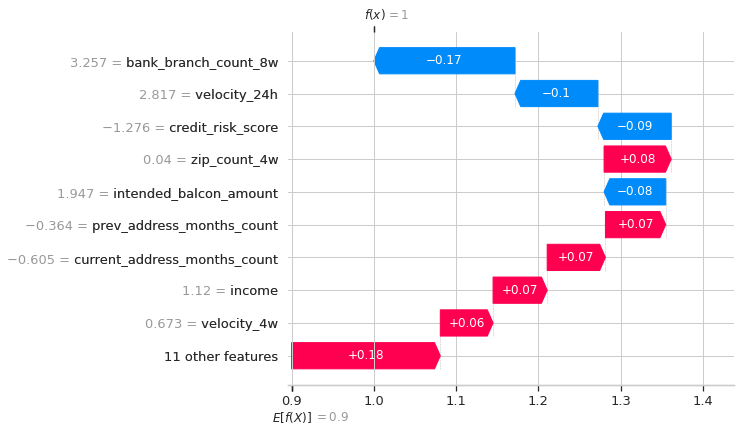

In [49]:
shap.plots.waterfall(shap_values[2])

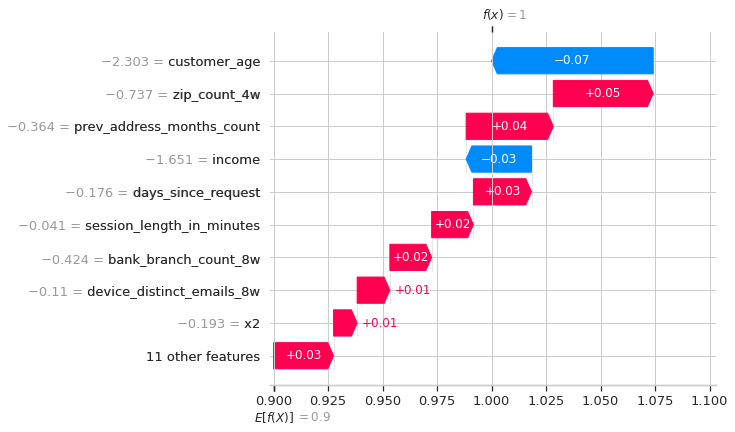

In [50]:
shap.plots.waterfall(shap_values[4])

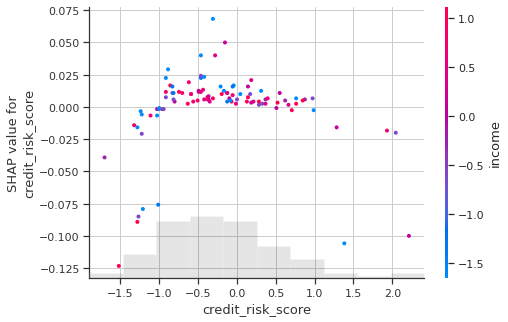

In [51]:
shap.plots.scatter(shap_values[:,'credit_risk_score'], color=shap_values)

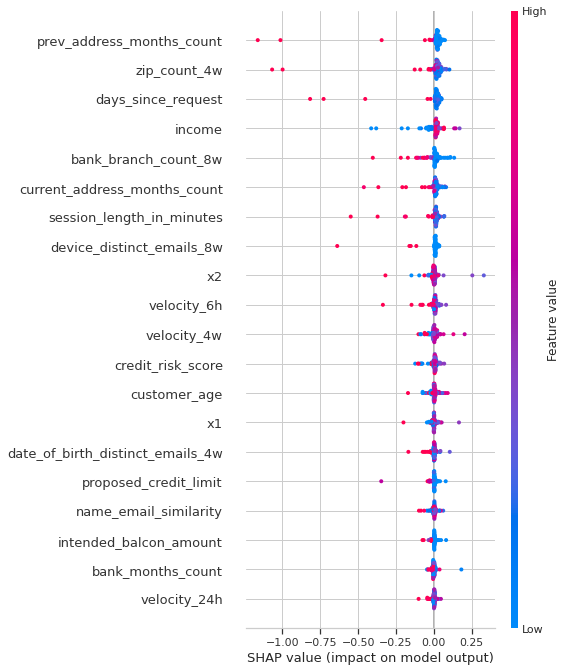

In [52]:
# Os atributos do topo contribuem mais para a saída do modelo, pois possuem os maiores valores absolutos.
# Valores altos como housing_status_BA, device_os_linux, house_status_BA contribuem para anomalias
# Valores altos dessa característica implicam que temos um item anômalo
shap.summary_plot(shap_values, X)

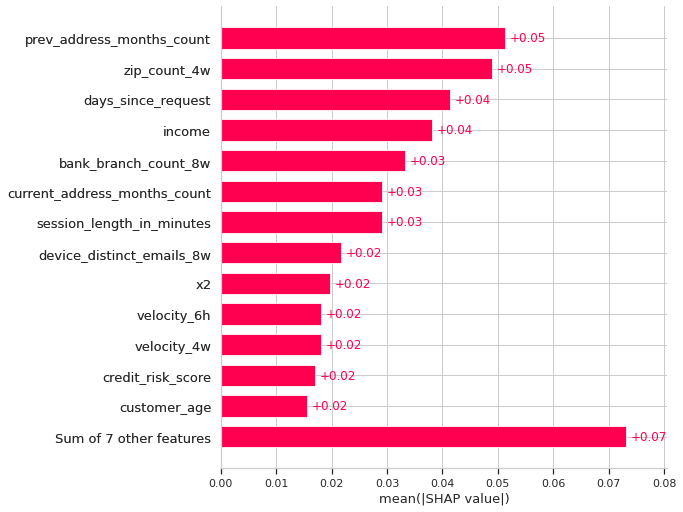

In [53]:
shap.plots.bar(shap_values,max_display=14)

## LocalOutlierFactor

In [54]:
model = LocalOutlierFactor(n_neighbors=20) 
fraude1['anomaly_lof'] = model.fit_predict(df_scaled1)

In [55]:
model = LocalOutlierFactor(n_neighbors=20) 
fraude2['anomaly_lof'] = model.fit_predict(df_scaled2)

In [56]:
model = LocalOutlierFactor(n_neighbors=20) 
fraude3['anomaly_lof'] = model.fit_predict(df_scaled3)

## Matriz de Confusão
#### Avaliando as saídas dos algoritmos de anomalia com o gabarito

In [86]:
def matriz_confusao(confusion_matrix):
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.grid(False)
    plt.show()

In [66]:
# Importar dados
gabarito1 = pd.read_excel('Continuação/gabarito1.xlsx')
gabarito1.tail()

,fraud_bool
9677,0
9678,0
9679,0
9680,0
9681,0


In [67]:
fraude1['anomaly_if_correcao'] = np.where(fraude1['anomaly_if']==1, 0, 1)
fraude1['anomaly_lof_correcao'] = np.where(fraude1['anomaly_lof']==1, 0, 1)
fraude1.reset_index(inplace=True)
fraude1.tail()

,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_fraud_count,payment_type,employment_status,housing_status,...,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,anomaly_if,anomaly_lof,anomaly_if_correcao,anomaly_lof_correcao,gabarito
9676,0.0,0.0,1.0,0.0,0.0,0.0,0.0,AC,CA,BB,...,181.0,-1.0,1000.0,20.433073,1.0,1,1,0,0,NaN
9677,1.0,0.0,1.0,0.0,0.0,1.0,0.0,AB,CA,BE,...,109.0,25.0,200.0,1.605454,1.0,1,1,0,0,NaN
9678,0.0,0.0,1.0,0.0,1.0,1.0,0.0,AC,CA,BC,...,84.0,-1.0,200.0,6.328282,1.0,1,1,0,0,NaN
9679,1.0,1.0,1.0,0.0,0.0,0.0,0.0,AB,CE,BA,...,228.0,16.0,2000.0,13.401206,1.0,1,1,0,0,NaN
9680,1.0,0.0,1.0,0.0,0.0,1.0,0.0,AC,CA,BB,...,220.0,-1.0,500.0,-1.000000,0.0,-1,1,1,0,NaN


In [72]:
fraude1 = fraude1.merge(gabarito1, right_index=True, left_index=True, how='left')

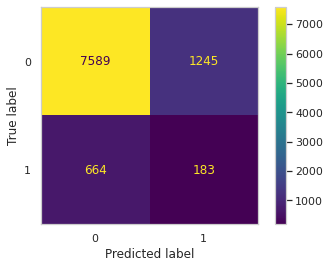

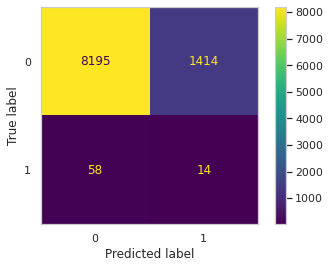

In [109]:
cm=confusion_matrix(fraude1['anomaly_if_correcao'],fraude1['fraud_bool'])
matriz_confusao(cm)
cm=confusion_matrix(fraude1['anomaly_lof_correcao'],fraude1['fraud_bool'])
matriz_confusao(cm)

In [94]:
gabarito2 = pd.read_excel('Continuação/gabarito2.xlsx')
gabarito2.drop(columns=['Unnamed: 0'], inplace=True)
gabarito2.head()

,fraud_bool
0,0
1,0
2,0
3,0
4,0


In [95]:
gabarito2.shape

(19356, 1)

In [96]:
fraude2.shape

(19355, 20)

In [97]:
fraude2['anomaly_if_correcao'] = np.where(fraude2['anomaly_if']==1, 0, 1)
fraude2['anomaly_lof_correcao'] = np.where(fraude2['anomaly_lof']==1, 0, 1)
fraude2.reset_index(inplace=True)
fraude2.tail()

,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_fraud_count,payment_type,employment_status,housing_status,...,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,anomaly_if,anomaly_lof,anomaly_if_correcao,anomaly_lof_correcao
19350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,AB,CA,BC,...,8.0,84.0,1.0,200.0,16.893820,1.0,1,1,0,0
19351,0.0,0.0,1.0,0.0,0.0,1.0,0.0,AB,CA,BA,...,8.0,104.0,21.0,200.0,5.104946,1.0,1,1,0,0
19352,1.0,1.0,1.0,0.0,0.0,1.0,0.0,AD,CA,BC,...,10.0,160.0,1.0,990.0,18.493059,1.0,1,1,0,0
19353,1.0,1.0,0.0,0.0,0.0,1.0,0.0,AB,CA,BC,...,4.0,218.0,15.0,1000.0,5.217250,1.0,1,1,0,0
19354,1.0,0.0,1.0,0.0,0.0,0.0,0.0,AA,CA,BA,...,5.0,233.0,6.0,200.0,9.599654,1.0,1,1,0,0


In [98]:
fraude2 = fraude2.merge(gabarito2, right_index=True, left_index=True, how='left')

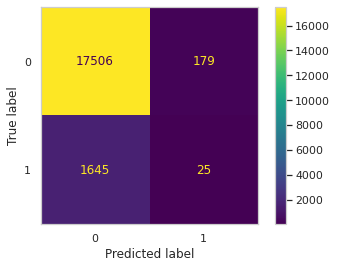

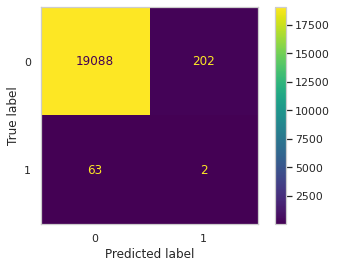

In [110]:
cm=confusion_matrix(fraude2['anomaly_if_correcao'],fraude2['fraud_bool'])
matriz_confusao(cm)
cm=confusion_matrix(fraude2['anomaly_lof_correcao'],fraude2['fraud_bool'])
matriz_confusao(cm)

In [102]:
gabarito3 = pd.read_excel('Continuação/gabarito3.xlsx')
gabarito3.head()

,Unnamed: 0,fraud_bool
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [103]:
gabarito3.shape

(16395, 2)

In [104]:
fraude3.shape

(16394, 22)

In [105]:
fraude3['anomaly_if_correcao'] = np.where(fraude3['anomaly_if']==1, 0, 1)
fraude3['anomaly_lof_correcao'] = np.where(fraude3['anomaly_lof']==1, 0, 1)
fraude3.reset_index(inplace=True)
fraude3.tail()

,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_fraud_count,payment_type,employment_status,housing_status,...,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,x1,x2,anomaly_if,anomaly_lof,anomaly_if_correcao,anomaly_lof_correcao
16389,0,0,1,1,0,1,0,AA,CA,BE,...,28,510,60.336201,1,0.081318,0.140885,-1,1,1,0
16390,1,1,1,1,0,0,0,AA,CA,BB,...,21,200,17.889487,1,1.351126,0.068594,1,1,0,0
16391,0,1,1,1,0,1,0,AA,CA,BB,...,28,200,5.185161,1,0.836005,1.543359,1,1,0,0
16392,0,0,1,1,0,1,0,AA,CA,BA,...,25,1000,3.249265,1,-2.743222,-1.305718,1,1,0,0
16393,0,1,1,0,0,1,0,AC,CA,BB,...,-1,200,47.619174,1,1.195039,2.311562,1,1,0,0


In [106]:
fraude3 = fraude3.merge(gabarito3, right_index=True, left_index=True, how='left')

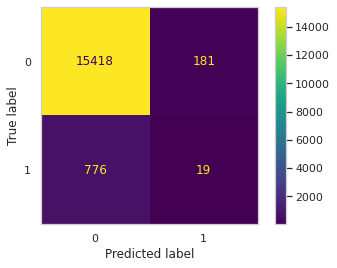

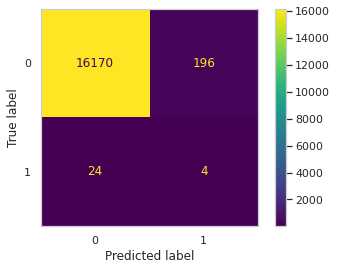

In [111]:
cm=confusion_matrix(fraude3['anomaly_if_correcao'],fraude3['fraud_bool'])
matriz_confusao(cm)
cm=confusion_matrix(fraude3['anomaly_lof_correcao'],fraude3['fraud_bool'])
matriz_confusao(cm)